In [1]:
import numpy as np

h=0
m=1
n=1

xa = -1
ya = -1
xb = 1
yb = 1
r = 0

last_U = []

# u_t = del_sq(u_xx)

def a(i,j):
    return -r/2

def b(i,j):
    return 1+r

def c(i,j):
    return -r/2

def d_const_j(i,j):
    i+=1
    j+=1
    return last_U[i][j+1]*r/2 + last_U[i][j]*(1-r) + last_U[i][j-1]*r/2

def d_const_i(i,j):
    i+=1
    j+=1
    return last_U[i+1][j]*r/2 + last_U[i][j]*(1-r) + last_U[i-1][j]*r/2

def ADI(step, r_value, time_steps):
    global h
    h = step
    global n
    global m
    m = int((xb-xa)/h)
    n = int((yb-ya)/h)
    global r
    r = r_value
    U = []
    U.append([[np.cos(np.pi*(xa+i*h)/2) * np.cos(np.pi*(ya+j*h)/2) for i in range(0,m+1)] for j in range(0,n+1)])
    global last_U
    last_U = U[0]
    for t in range(time_steps):
        U_half = [[0] for i in range(m+1)]
        for j in range(n-1):
            c_dash = [c(0,j)/b(0,j)]
            d_dash = [d_const_j(0,j)/b(0,j)]
            for i in range(1,m-1):
                c_dash.append(c(i,j)/(b(i,j)-a(i,j)*c_dash[i-1]))
                d_dash.append((d_const_j(i,j)-a(i,j)*d_dash[i-1])/(b(i,j)-a(i,j)*c_dash[i-1]))
            temp = [d_dash[m-2],0]
            for i in range(m-3,-1,-1):
                temp.insert(0,d_dash[i]-c_dash[i]*temp[0])
            temp.insert(0,0)
            for i in range(m+1):
                U_half[i].append(temp[i])
        for i in range(m+1):
                U_half[i].append(0)
        last_U = U_half
            
        U_next = [[0 for j in range(n+1)]]
        for i in range(m-1):
            c_dash = [c(i,0)/b(i,0)]
            d_dash = [d_const_i(i,0)/b(i,0)]
            for j in range(1,n-1):
                c_dash.append(c(i,j)/(b(i,j)-a(i,j)*c_dash[j-1]))
                d_dash.append((d_const_i(i,j)-a(i,j)*d_dash[j-1])/(b(i,j)-a(i,j)*c_dash[j-1]))
            temp = [d_dash[n-2],0]
            for i in range(n-3,-1,-1):
                temp.insert(0,d_dash[i]-c_dash[i]*temp[0])
            temp.insert(0,0)
            U_next.append(temp)
        U_next.append([0 for j in range(n+1)])
        last_U = U_next
        U.append(U_next)
    return U

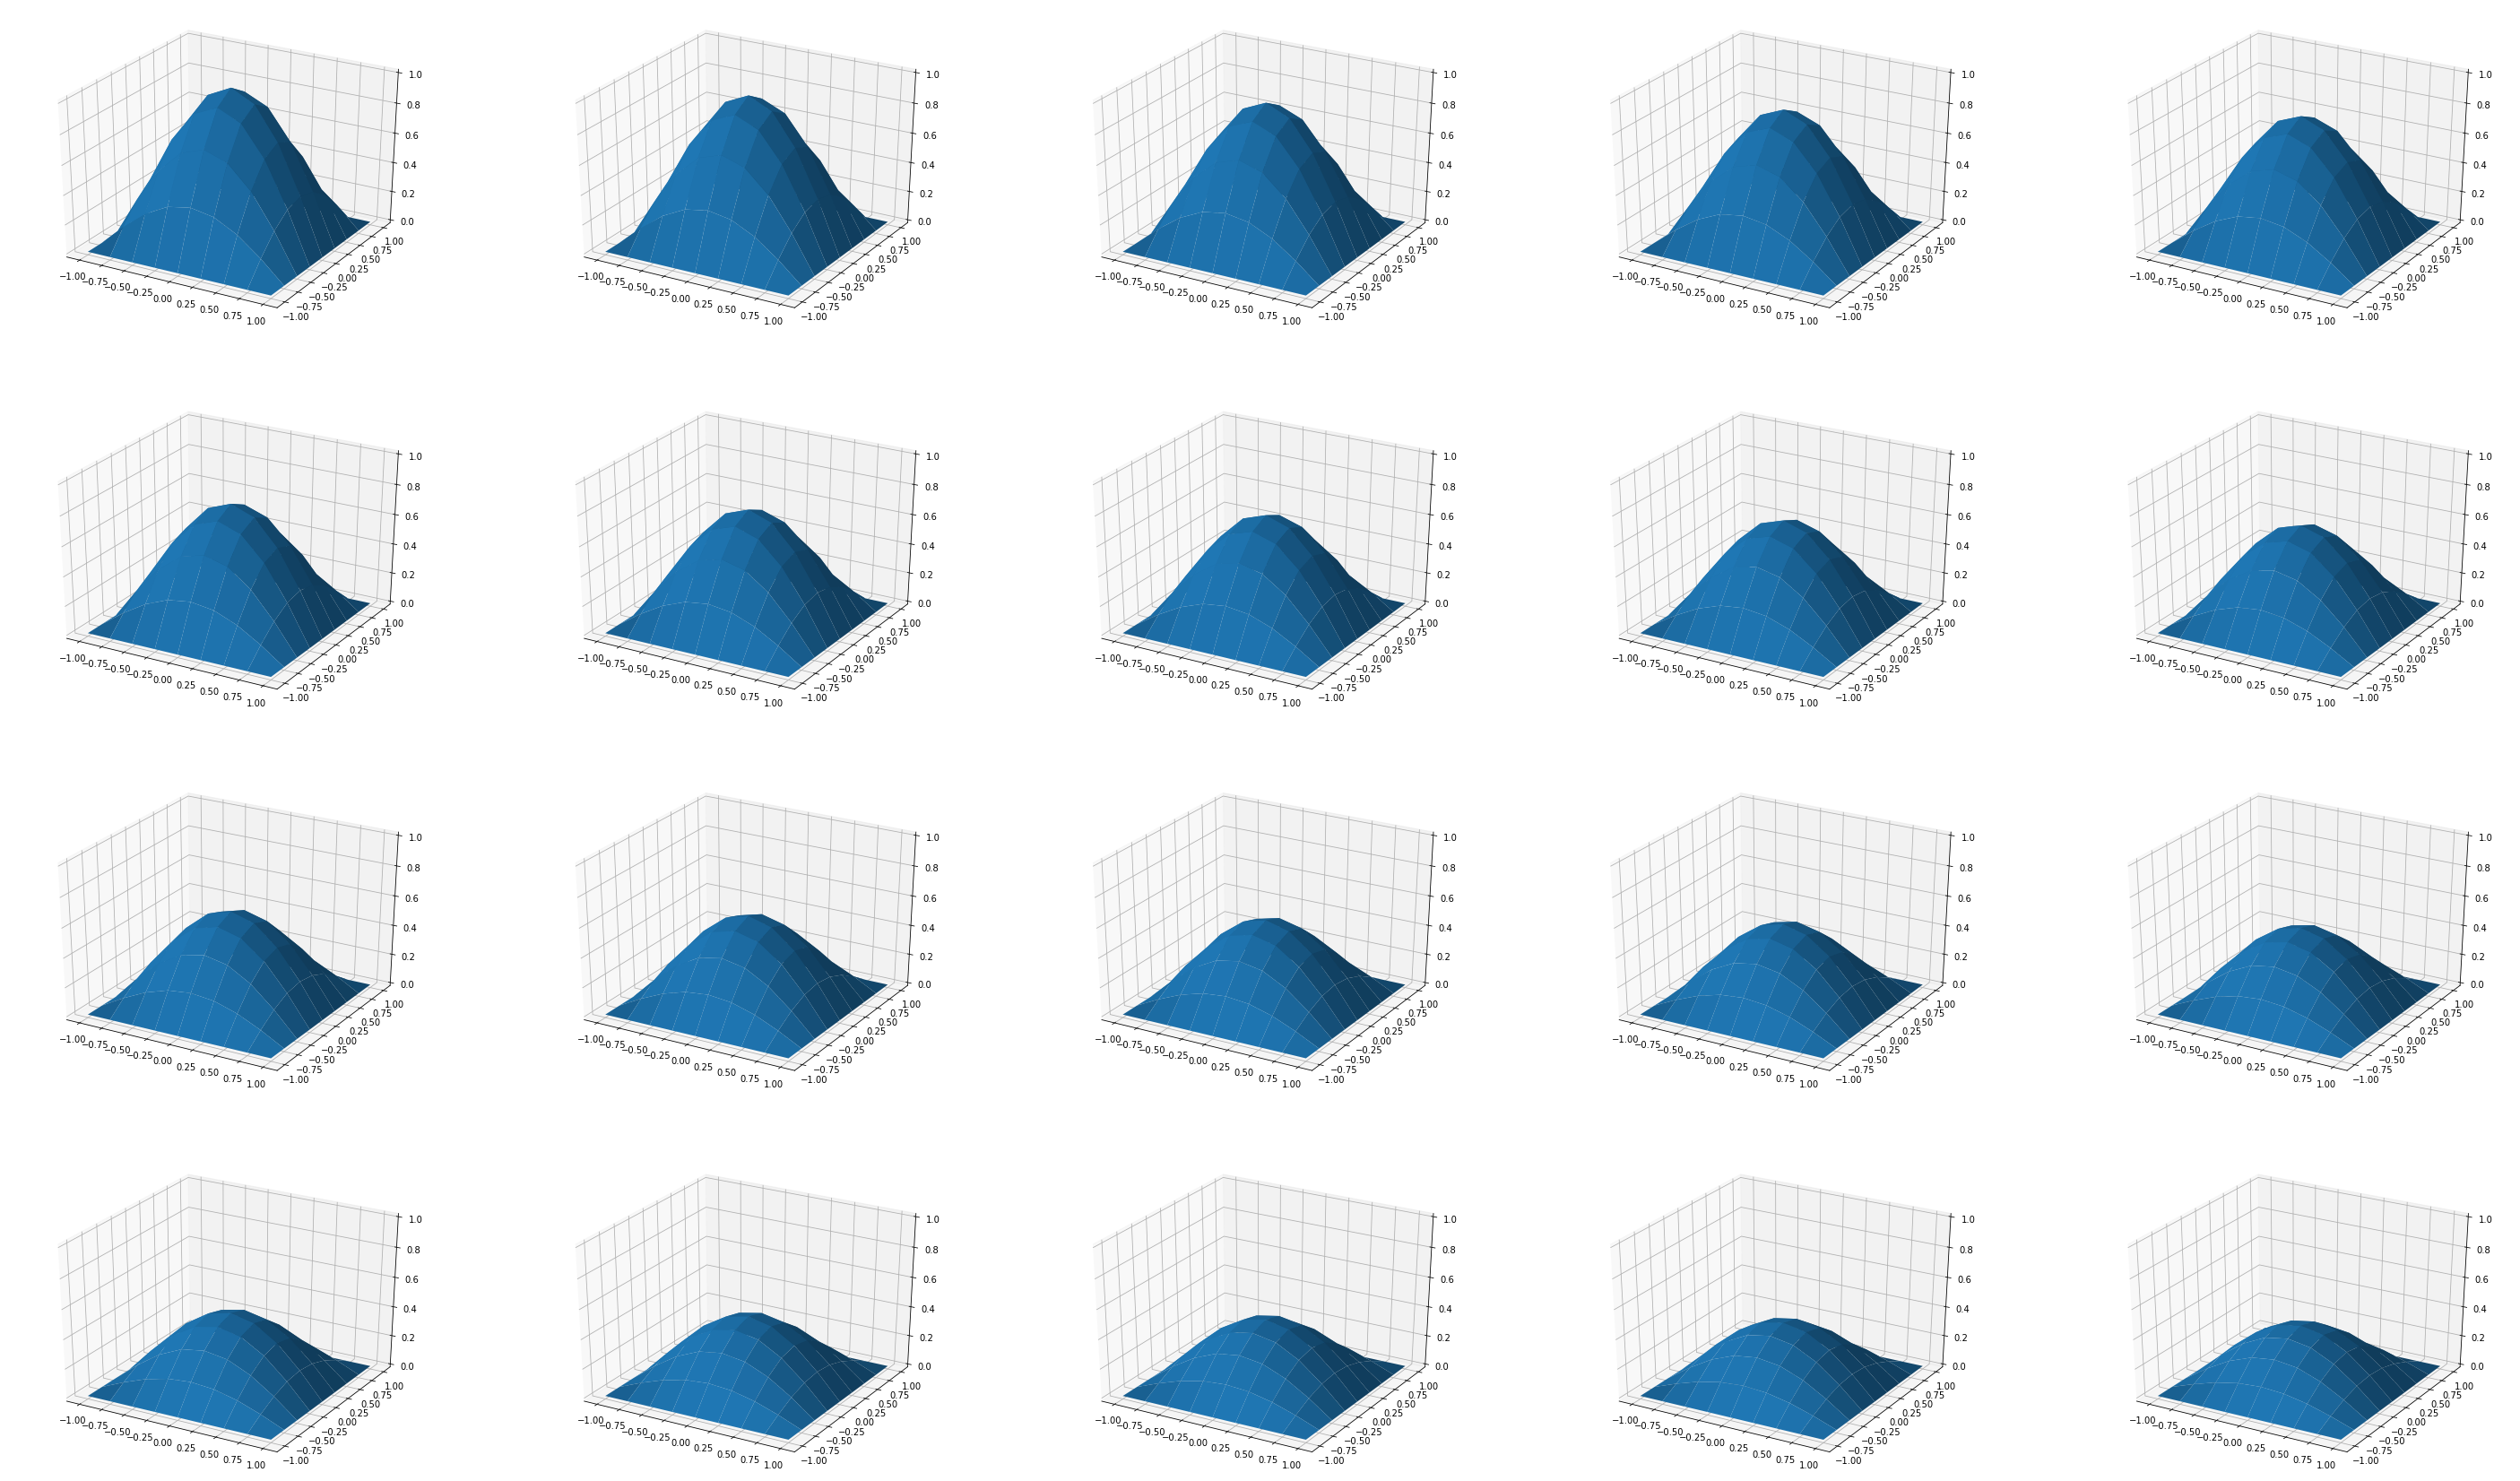

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

time_steps = 20
U = ADI(0.25, 1/6, time_steps)

fig = plt.figure(figsize=(50,30))
min_val = np.amin(np.array(U))
max_val = np.amax(np.array(U))
for i in range(time_steps):
    ax = fig.add_subplot(4,5,i+1, projection='3d')
    ax.set_zlim(min_val, max_val)
    X = [xa+i*h for i in range(m+1)]
    x, y = np.meshgrid(X, X)
    ax.plot_surface(x, y, np.asmatrix(U[i]))

plt.show()

In [ ]:
time_steps = 20
U = ADI(0.1, 1/6, time_steps)

fig = plt.figure(figsize=(50,30))
min_val = np.amin(np.array(U))
max_val = np.amax(np.array(U))
for i in range(time_steps):
    ax = fig.add_subplot(4,5,i+1, projection='3d')
    ax.set_zlim(min_val, max_val)
    X = [xa+i*h for i in range(m+1)]
    x, y = np.meshgrid(X, X)
    ax.plot_surface(x, y, np.asmatrix(U[i]))

plt.show()